# Tune Gordon

In [7]:
# imports

from importlib import reload

from functools import partial

import numpy as np
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


from datetime import datetime, time
import random 
import torch

import pandas
import seaborn as sns

from oceancolor.utils import plotting 
from oceancolor.iop import cross
from oceancolor.hydrolight import loisel23

from ihop import io as ihop_io
from ihop.iops import decompose 
from ihop.iops import io as iops_io
from ihop.emulators import io as emu_io
from ihop.inference import io as inf_io
from ihop.training_sets import load_rs
from ihop.inference import fgordon

import gordon

In [2]:
%matplotlib ipympl

# Load

In [29]:
reload(gordon)
idx = 170
odict = gordon.prep_data(idx)

# Calculate

In [30]:
reload(fgordon)
Rrs = fgordon.calc_Rrs(odict['a'], odict['bb'])
Rrs_11 = fgordon.calc_Rrs(odict['a'], odict['bb'], in_G1=0.1, in_G2=0.1)

In [31]:
bbnw = odict['bb'] - odict['bbw']
bb_2 = 2*bbnw + odict['bbw']
#
Rrs_2 = fgordon.calc_Rrs(odict['a'], bb_2)

# Plot

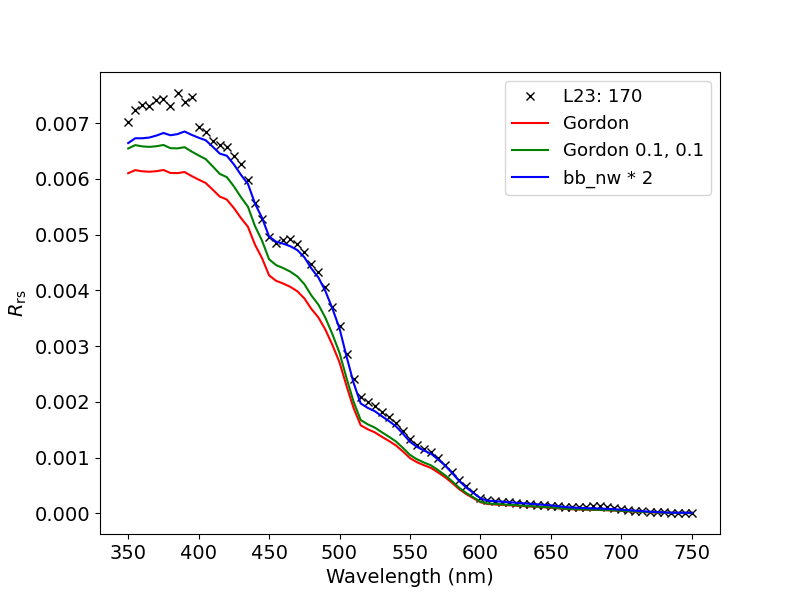

In [33]:
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
#
ax.plot(odict['true_wave'], odict['true_Rrs'], 'kx', label=f'L23: {idx}')
ax.plot(odict['true_wave'], Rrs, 'r-', label='Gordon')
ax.plot(odict['true_wave'], Rrs_11, 'g-', label='Gordon 0.1, 0.1')
ax.plot(odict['true_wave'], Rrs_2, 'b-', label='bb_nw * 2')
#
ax.legend(fontsize=13.)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$R_{\rm rs}$')
plotting.set_fontsize(ax, 14)
plt.show()